In [4]:
import numpy as np

In [5]:
def unit_step_func(x):
    return np.where(x > 0 , 1, 0)

In [6]:
class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = unit_step_func
        self.weights = None
        self.bias = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_=y

        #y_ = np.where(y > 0 , 1, 0)

        # learn weights
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                #print(x_i)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update


    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted




In [7]:
# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X, y = datasets.make_blobs(
        n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2
    )
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=123
    )
    print(X_train)
    p = Perceptron(learning_rate=0.01, n_iters=1000)
    p.fit(X_train, y_train)
    predictions = p.predict(X_test)
    print(predictions)

    print("Perceptron classification accuracy", accuracy(y_test, predictions))

[[ -1.96601474  -8.59689627]
 [  1.40959572  -1.62390046]
 [ -0.75207647 -10.78902785]
 [ -0.53278301  -1.64847081]
 [ -0.12118447  -1.40749481]
 [  1.63390085  -0.8488804 ]
 [  2.16703063  -1.58150634]
 [ -2.22746033 -10.10199625]
 [  0.41265265  -0.97904899]
 [ -0.94967461  -0.94653968]
 [  0.80950287  -2.80255275]
 [ -1.51976189 -11.65456824]
 [ -2.77238005  -9.64264532]
 [ -0.71409072 -10.10744305]
 [ -2.39394095  -8.86022552]
 [ -3.10495944  -8.38861021]
 [  0.48926519  -2.3641837 ]
 [ -0.4141638   -8.1708518 ]
 [ -2.0136214  -10.45681188]
 [ -0.28925107   0.60114833]
 [ -0.70107521  -7.07465695]
 [  2.18263294  -0.90473206]
 [ -0.89113519  -8.05385981]
 [ -1.49987326  -1.23210622]
 [  1.05336305  -1.12650924]
 [ -2.46989189  -9.02672818]
 [  2.0020706   -0.49726328]
 [ -1.68069426  -9.4116619 ]
 [ -1.57009042 -10.02420345]
 [ -1.56261177  -7.13854024]
 [ -0.82493081  -8.13917717]
 [ -0.54909408  -8.74918828]
 [ -0.72959071  -8.70943181]
 [  1.90763236  -0.67110501]
 [ -3.24159714

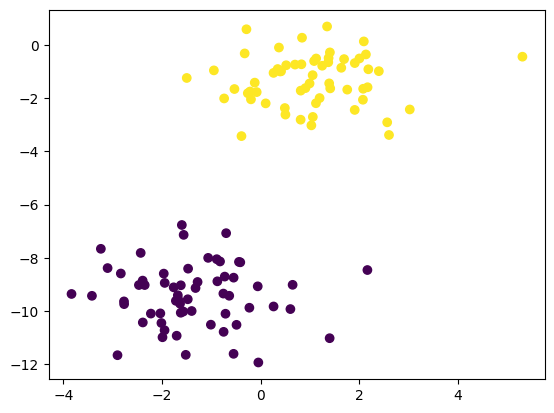

In [8]:
fig = plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1],c=y_train)

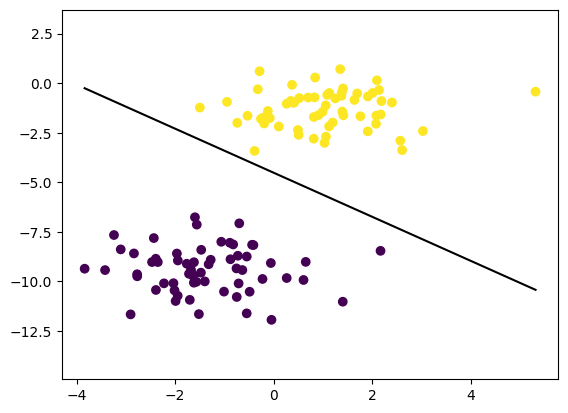

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

x0_1 = np.amin(X_train[:, 0])
x0_2 = np.amax(X_train[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2],"k")

ymin = np.amin(X_train[:, 1])
ymax = np.amax(X_train[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])

plt.show()